In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('test_dataset.csv', sep=',')
data.head()

,Unnamed: 0,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss
0,0,89988194,100,EURGBP-OTC,call,2021-03-01 00:02:18.1+02,2021-03-01 00:03:02.247+02,17.860599,15.555709
1,1,47603482,101,USDJPY-OTC,call,2021-03-01 00:03:40.251+02,2021-03-01 00:04:33.852+02,15.470000,9.387316
2,2,10163731,101,EURGBP-OTC,put,2021-03-01 00:03:47.164+02,2021-03-01 00:05:03.532+02,10.000000,9.127109
3,3,83912177,100,EURJPY-OTC,put,2021-03-01 00:08:57.993+02,2021-03-01 00:10:02.186+02,35.721199,31.105138
4,4,79331163,100,EURGBP-OTC,call,2021-03-01 00:10:01.878+02,2021-03-01 00:11:02.708+02,17.860599,16.303911


In [ ]:
# 1. DATA PREPARATION

In [3]:
# we drop unnamed column 
df = data
df = df.drop('Unnamed: 0',axis=1) 

In [4]:
# we turn entry_time, exit_time into date format and calculate duration of trade in seconds 

df['entry_time'] = pd.to_datetime(df['entry_time'], format='%Y-%m-%d %H:%M:%S.%f') 
df['exit_time'] = pd.to_datetime(df['exit_time'], format='%Y-%m-%d %H:%M:%S.%f')
df['duration'] = df['exit_time']-df['entry_time'] 
df['duration'] = df['duration'].dt.total_seconds() #Duration in seconds

In [5]:
df.head()

,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss,duration
0,89988194,100,EURGBP-OTC,call,2021-03-01 00:02:18.100000+02:00,2021-03-01 00:03:02.247000+02:00,17.860599,15.555709,44.147
1,47603482,101,USDJPY-OTC,call,2021-03-01 00:03:40.251000+02:00,2021-03-01 00:04:33.852000+02:00,15.470000,9.387316,53.601
2,10163731,101,EURGBP-OTC,put,2021-03-01 00:03:47.164000+02:00,2021-03-01 00:05:03.532000+02:00,10.000000,9.127109,76.368
3,83912177,100,EURJPY-OTC,put,2021-03-01 00:08:57.993000+02:00,2021-03-01 00:10:02.186000+02:00,35.721199,31.105138,64.193
4,79331163,100,EURGBP-OTC,call,2021-03-01 00:10:01.878000+02:00,2021-03-01 00:11:02.708000+02:00,17.860599,16.303911,60.830


In [6]:
#Turn Asset into integers for further analysis, so 1 will correspond to most common asset EURUSD  and 31 to least used asset

data_asset_agg = data.groupby(['asset'], as_index = False).size().reset_index(name='count')
data_asset_agg.sort_values(by = 'count', ascending=False)
data_asset_agg = data_asset_agg.sort_values(by = 'count', ascending=False)
print(data_asset_agg.head(2), "\n", data_asset_agg.tail(2), "\n", "\n", "number of assets: {}".format(len(data_asset_agg)))

     asset   count
11  EURUSD  187375
16  GBPJPY   95616 
          asset  count
30  USDZAR-OTC     14
29  USDXOF-OTC     10 
 
 number of assets: 31


In [7]:
asset_dict = dict(zip(data_asset_agg['asset'], range(1, len(data_asset_agg)+1)))    
df['asset']= [asset_dict[item] for item in  df['asset']]

In [8]:
df.head()

,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss,duration
0,89988194,100,20,call,2021-03-01 00:02:18.100000+02:00,2021-03-01 00:03:02.247000+02:00,17.860599,15.555709,44.147
1,47603482,101,23,call,2021-03-01 00:03:40.251000+02:00,2021-03-01 00:04:33.852000+02:00,15.470000,9.387316,53.601
2,10163731,101,20,put,2021-03-01 00:03:47.164000+02:00,2021-03-01 00:05:03.532000+02:00,10.000000,9.127109,76.368
3,83912177,100,17,put,2021-03-01 00:08:57.993000+02:00,2021-03-01 00:10:02.186000+02:00,35.721199,31.105138,64.193
4,79331163,100,20,call,2021-03-01 00:10:01.878000+02:00,2021-03-01 00:11:02.708000+02:00,17.860599,16.303911,60.830


In [9]:
# We turn Direction into integers for further analysis: call := 1, put := 2

direction = dict(zip(df['direction'].unique(), range(1,3)))    
df['direction']= [direction[item] for item in  df['direction']]

In [10]:
df.head()

,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss,duration
0,89988194,100,20,1,2021-03-01 00:02:18.100000+02:00,2021-03-01 00:03:02.247000+02:00,17.860599,15.555709,44.147
1,47603482,101,23,1,2021-03-01 00:03:40.251000+02:00,2021-03-01 00:04:33.852000+02:00,15.470000,9.387316,53.601
2,10163731,101,20,2,2021-03-01 00:03:47.164000+02:00,2021-03-01 00:05:03.532000+02:00,10.000000,9.127109,76.368
3,83912177,100,17,2,2021-03-01 00:08:57.993000+02:00,2021-03-01 00:10:02.186000+02:00,35.721199,31.105138,64.193
4,79331163,100,20,1,2021-03-01 00:10:01.878000+02:00,2021-03-01 00:11:02.708000+02:00,17.860599,16.303911,60.830


(7.0, 0.0)

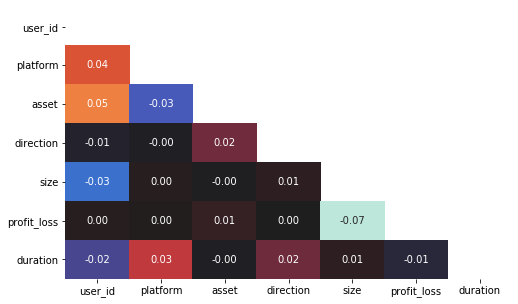

In [11]:
# Check if there're any corellations

plt.figure(figsize=(8,5))
corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
ax = sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0)
ax.set_ylim(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1] - 0.5)

# NO EXPLICIT CORELLATIONS 

In [ ]:
# ANOMALIES OF PROFIT_LOSS

# Below we'll focus on dependencies "profit_loss" vs. "other parameters" 
#(because I'm asuming that noticable profit or loss is one of signs of a anomaly)

In [ ]:
# 2 EXPLORATORY DATA ANALYSIS

In [12]:
# "profit_loss" vs. "entry_time"  and "exit_time"

#max duration of trade in minutes is ~ 16 minutes. That is why graphs with 'entry' and 'exit' look same on scale of few days

print("max duration of trade in minutes is approx. {:.0f}".format((df.sort_values(by = 'duration').max().duration)/60))

max duration of trade in minutes is approx. 16


C:\Users\User\Anaconda3\lib\site-packages\seaborn\relational.py:915: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


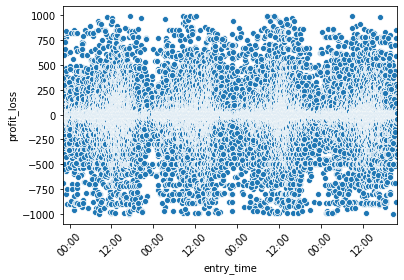

In [13]:
g1 = sns.scatterplot(data=df, x="entry_time", y="profit_loss", palette="vlag")
g1.set_xlim(df['entry_time'].min(), df['entry_time'].max())
myFmt = mdates.DateFormatter('%H:%M')
g1.xaxis.set_major_formatter(myFmt)
for item in g1.get_xticklabels():
    item.set_rotation(45) 
plt.show()



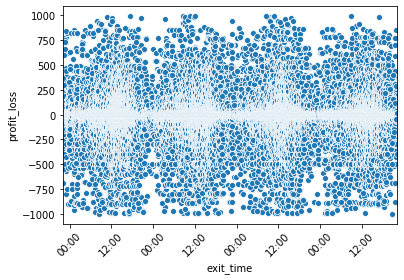

In [14]:
g2 = sns.scatterplot(data=df, x="exit_time", y="profit_loss", palette="vlag")
g2.set_xlim(df['exit_time'].min(), df['exit_time'].max())
myFmt = mdates.DateFormatter('%H:%M')
g2.xaxis.set_major_formatter(myFmt)
for item in g2.get_xticklabels():
    item.set_rotation(45) 
plt.show()

In [ ]:
# since there is no explicit difference between days in given "profit_loss" vs. "entry_time", "exit_time" dependecies ---
# we'll convolute time into one day and after that turn HH:MM:SS to seconds to ease further analysis

In [16]:
df['entry_time'] = df['entry_time'].dt.strftime('%H:%M:%S.%f')
df['exit_time'] = df['exit_time'].dt.strftime('%H:%M:%S.%f')

In [17]:
df.head()

,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss,duration
0,89988194,100,20,1,00:02:18.100000,00:03:02.247000,17.860599,15.555709,44.147
1,47603482,101,23,1,00:03:40.251000,00:04:33.852000,15.470000,9.387316,53.601
2,10163731,101,20,2,00:03:47.164000,00:05:03.532000,10.000000,9.127109,76.368
3,83912177,100,17,2,00:08:57.993000,00:10:02.186000,35.721199,31.105138,64.193
4,79331163,100,20,1,00:10:01.878000,00:11:02.708000,17.860599,16.303911,60.830


In [18]:
# function to conver HH:MM:SS into seconds

def time_convert(x):
    times = x.split(':')
    return (3600*int(times[0])+60*int(times[1]))+int(float(times[2]))

In [19]:
df['entry_time'] = df['entry_time'].apply(time_convert)
df['exit_time'] = df['exit_time'].apply(time_convert)

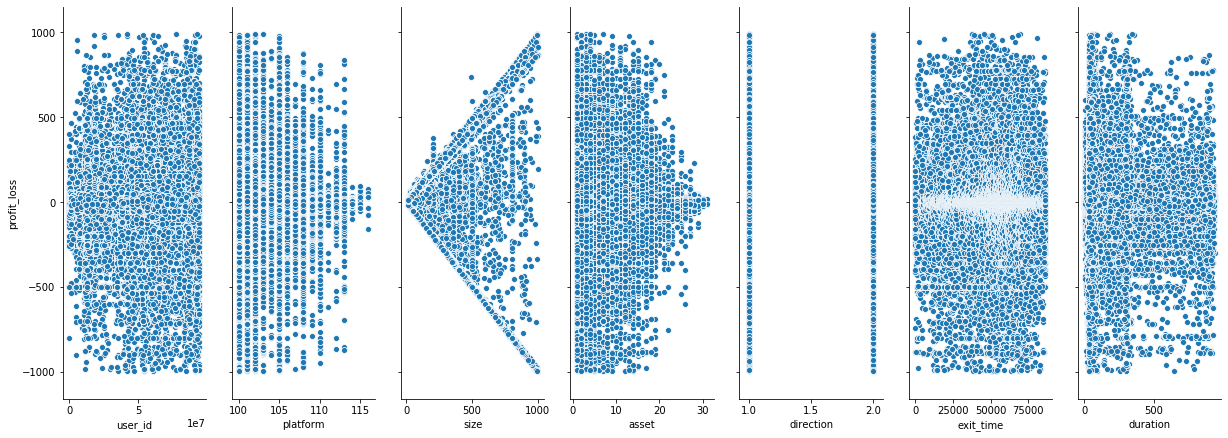

In [47]:
# Now we plot all "profit_loss" vs. "other parameters" 

g = sns.pairplot(df,
    x_vars=["user_id", "platform", "size", "asset", "direction", "exit_time", "duration"],
    y_vars=["profit_loss"]
    )
g.fig.set_size_inches(17,8)


#"profit_loss" vs. "direction" seems uninformative 

# there are outliers at "profit_loss" vs. "size" above the triangle where the main data is

In [25]:
#3 3-SIGMA model

In [26]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [27]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers))) 

In [36]:
data_features = df
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

# Percentage of outliers 8.04%  seems too big, probably 5-sigma could be more relevant here

# INTERQUARTILE RANGE provides similar results so, I'll not present it here

Total number of outliers: 66314
Percentage of outliers:   8.04%


In [37]:
comparison_table
# since 'user_id', 'direction', 'entry_price', 'exit_price' have 0 anomalies_percentage, 
# we plot ["platform", "asset", "size", "duration"]

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
user_id,1.396065e+08,-9.316152e+06,0.0,0.000000
platform,1.095861e+02,9.468306e+01,19034.0,2.308192
asset,2.042464e+01,-8.794878e+00,4674.0,0.566801
direction,3.023883e+00,2.790746e-02,0.0,0.000000
entry_time,1.095848e+05,-1.016292e+04,0.0,0.000000
exit_time,1.097093e+05,-1.016843e+04,0.0,0.000000
size,2.497918e+02,-1.698761e+02,16364.0,1.984410
profit_loss,2.103180e+02,-2.149401e+02,15258.0,1.850289
duration,6.170475e+02,-3.620204e+02,26580.0,3.223272


In [38]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = std_outliers

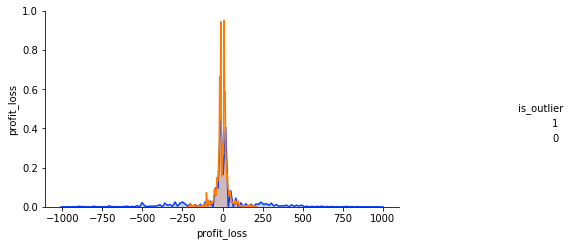

In [39]:
g = sns.pairplot(data=labeled_data,
    x_vars=["profit_loss"],
    y_vars=["profit_loss"],
    hue='is_outlier', hue_order=[1, 0],
    markers=['x', 'o'],  palette='bright'
    )
g.fig.set_size_inches(10,4)

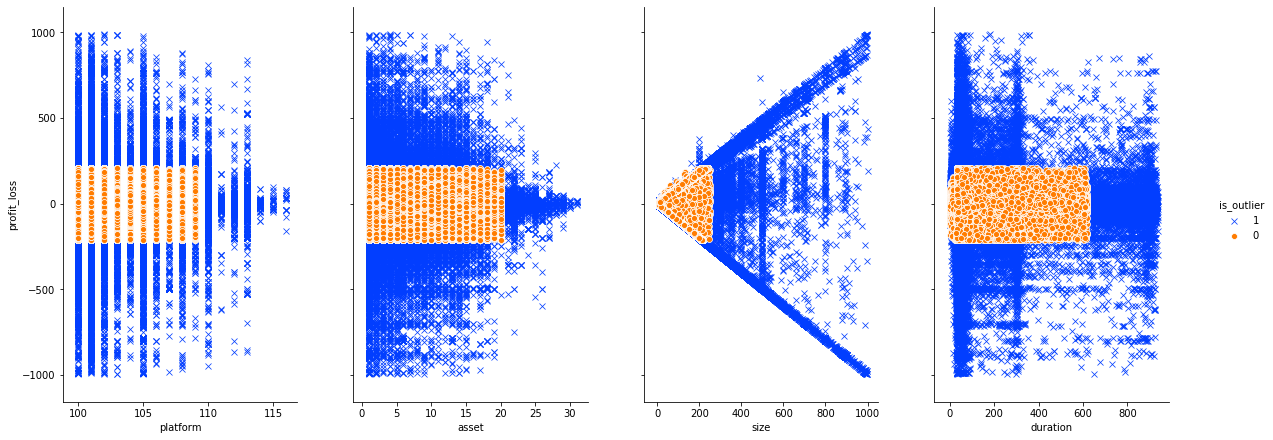

In [41]:
g = sns.pairplot(data=labeled_data,
    x_vars=["platform", "asset", "size", "duration"],
    y_vars=["profit_loss"],
    hue='is_outlier', hue_order=[1, 0],
    markers=['x', 'o'],  palette='bright'
    )
g.fig.set_size_inches(18,8)

In [42]:
# We take a look at profit_loss per user_I=id

df_profit_agg = df.groupby(['user_id'], as_index = False)['profit_loss'].agg('sum') 
df_profit_agg.sort_values(by='profit_loss') 

,user_id,profit_loss
261,7201974,-77374.121040
8635,48433589,-14288.201719
3118,25086734,-11775.272294
6047,43064874,-11669.029309
45886,94644188,-11655.625215
...,...,...
43037,93835287,6469.216178
32093,85295818,6530.125782
4140,33545786,6727.986114
44276,94236421,7291.566098


In [44]:
len(df_profit_agg)

46150

In [43]:
data_features = df_profit_agg
comparison_table, std_outliers = get_column_outliers(data_features)
anomalies_report(std_outliers)

Total number of outliers: 432
Percentage of outliers:   0.94%


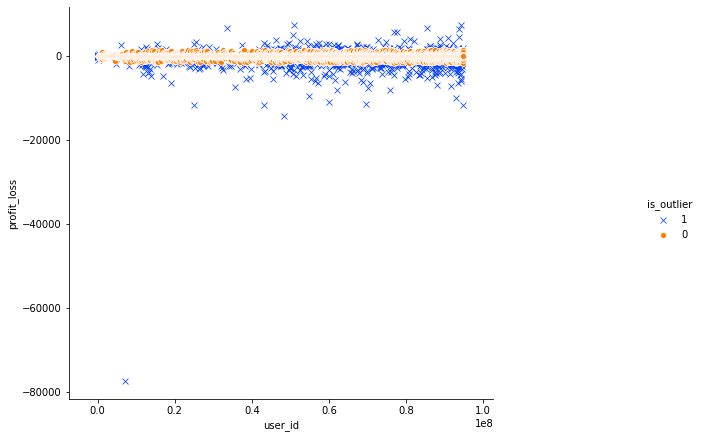

In [46]:
labeled_data = data_features.copy()
labeled_data['is_outlier'] = std_outliers
g = sns.pairplot(data=labeled_data,
    x_vars=["user_id"],
    y_vars=["profit_loss"],
    hue='is_outlier', hue_order=[1, 0],
    markers=['x', 'o'],  palette='bright'
    )
g.fig.set_size_inches(12,8)

# here profit_loss is Aggregated per User

In [ ]:
# 4 DBSCAN   

In [58]:
# I can't fit all the data because my laptop freeses totally (it's old)
# so I have to take only small portion of data

data_features_short = df.sample(frac=0.1)

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features_short), 
    columns=df.columns
)

In [60]:
scaled_data.head()

,user_id,platform,asset,direction,entry_time,exit_time,size,profit_loss,duration
0,0.646583,0.5,-0.428571,0.0,0.064427,0.063169,-0.302414,-0.358030,-0.004289
1,-0.695543,2.5,-0.428571,-1.0,-0.988840,-0.993284,3.440646,-3.022624,0.147244
2,-1.412902,3.5,-0.428571,-1.0,-0.107258,-0.080595,0.311563,0.732289,7.421038
3,-1.384856,2.5,0.000000,-1.0,-0.619024,-0.622981,-0.364996,0.286183,-0.067845
4,-1.453432,3.0,-0.142857,-1.0,0.854016,0.853730,-0.364996,0.113222,-0.495973


In [61]:
outlier_percentage = 0.2
num_clusters = []
anomaly_percentage = []

# loop to find relevant epsilon
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.05:    
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.2
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [62]:
anomalies_report(density_outlier)

Total number of outliers: 1605
Percentage of outliers:   1.95%


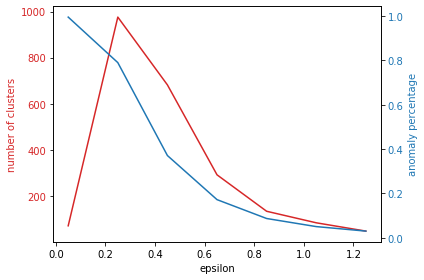

In [63]:
iterations = eps_history[:-1]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  # we already handled the x-label with ax1
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

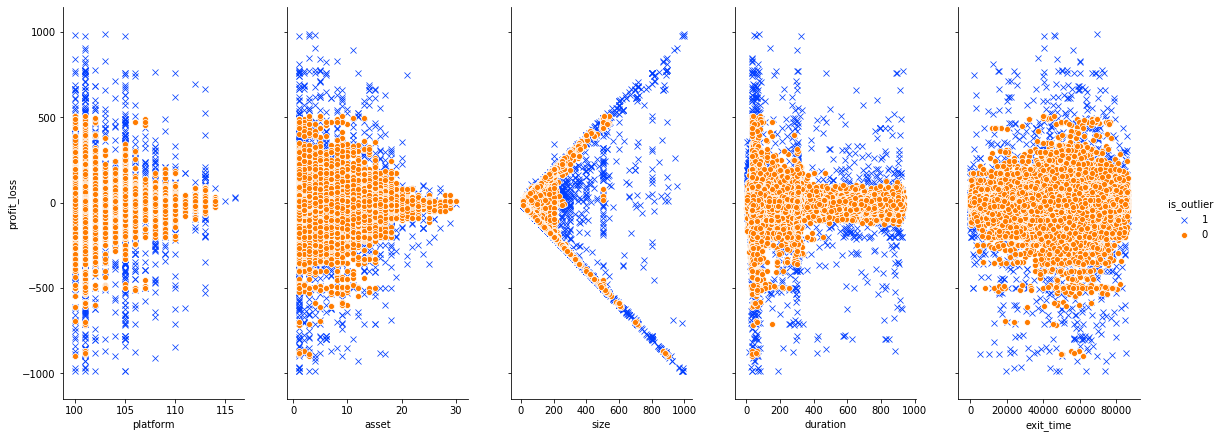

In [64]:
labeled_data = data_features_short.copy()
labeled_data['is_outlier'] = density_outlier
g = sns.pairplot(data=labeled_data,
    x_vars=["platform", "asset", "size", "duration", "exit_time"],
    y_vars=["profit_loss"],
    hue='is_outlier', hue_order=[1, 0],
    markers=['x', 'o'],  palette='bright'
    )
g.fig.set_size_inches(17,8)